In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import optimizers



In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'lung-data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']


In [4]:
data = tf.keras.utils.image_dataset_from_directory('lung-data')



Found 7097 files belonging to 4 classes.
Metal device set to: Apple M1


2022-08-07 00:58:03.004262: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 00:58:03.004707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

batch[0].min()

0.0

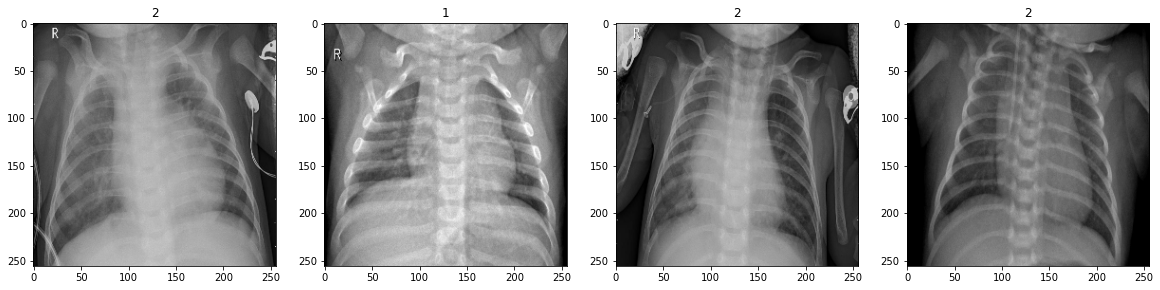

In [7]:
data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])



In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)



In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


Deep Learning Model


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [11]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) 
model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(4, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train Model

In [14]:
logdir = 'logs'

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [16]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/pips/Desktop/tf_files/lunghealth_tf/env/lib/python3.8/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [85]:
hist.history

{'loss': [-178731008.0,
  -31014987776.0,
  -477820944384.0,
  -2850111356928.0,
  -10307113058304.0,
  -28174421327872.0,
  -64342213001216.0,
  -127947084136448.0,
  -230460210806784.0,
  -385510325354496.0,
  -612214033612800.0,
  -919008043859968.0,
  -1315153748426752.0,
  -1837410363113472.0,
  -2506216227995648.0,
  -3311701642444800.0,
  -4304909339983872.0,
  -5485957432213504.0,
  -6917368563367936.0,
  -8590870894870528.0],
 'accuracy': [0.21915322542190552,
  0.21814516186714172,
  0.21915322542190552,
  0.21693548560142517,
  0.22036290168762207,
  0.21935483813285828,
  0.21794354915618896,
  0.2177419364452362,
  0.2177419364452362,
  0.21895161271095276,
  0.21572580933570862,
  0.21713709831237793,
  0.2201612889766693,
  0.2177419364452362,
  0.2163306474685669,
  0.2177419364452362,
  0.21935483813285828,
  0.21895161271095276,
  0.21794354915618896,
  0.21794354915618896],
 'val_loss': [-1467915648.0,
  -109836853248.0,
  -1134215168000.0,
  -5374271291392.0,
  -168

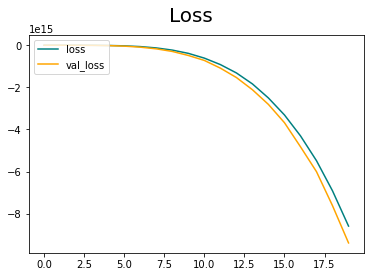

In [86]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize= 20)
plt.legend(loc="upper left")
plt.show()

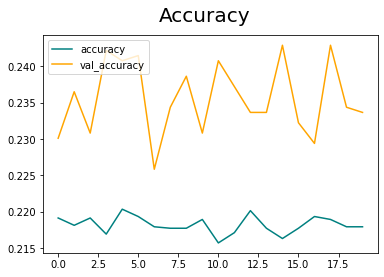

In [88]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize= 20)
plt.legend(loc="upper left")
plt.show()

In [93]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [94]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [97]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 19ms/step


In [101]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:0.9183238744735718, Recall:1.0, Accuracy:0.22372159361839294
